# Reto 04
## Por Jaffet León

El reto consiste en gráficar árboles de decisión posibles con load_breast_cancer. Siga las instrucciones y rellene los espacios que tienen ### con el código pertinente para que funcione el respectivo pedazo de código 

## Paso 0
Librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
%matplotlib inline

## Paso 1
Acomplete el código que a continuación le aparece (las partes con un ###). Las instrucciones son:
- La partición entre training y testing es de 80-20 %
- En la cariable columns, use numpy.append para agregar una nueva variable llamada 'target'
- Genere un print con los nombre de variable de X. Hagalo respetando espaciado con slash invertido

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
sizeMeasurements = pd.DataFrame(data, columns=columns)
X = sizeMeasurements[sizeMeasurements.columns[:-1]]
y = sizeMeasurements.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print('\n Feature Names: \n\n', X.columns.values, "\n")


 Feature Names: 

 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 



In [14]:
print(X)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## Paso 2
Recuerde lo que aprendió en los módulos de data analysis en Python y genere una gráfica-matriz de calor con los coeficientes de correlación de cada variable con Seaborn.
(Nota: use X_train.corr() como primer argumento de la función heatmap de seaborn)

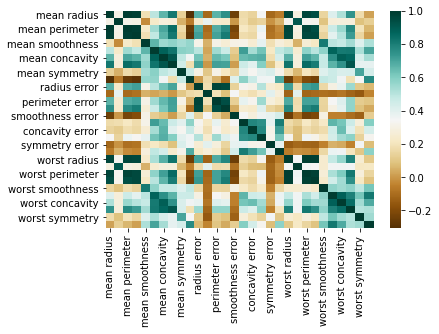

In [8]:
g = sns.heatmap(X_train.corr(),cmap="BrBG",annot=False)

## Paso 3
Ahora vamos a concentrar las variables no correlacionadas. Para ello:
- y2 debe ser redefinido con sizeMeasurements2, pero como u ntarget de sci kit-learn
- Debes volver a generar una partición para training al 80-20%
- en la penúltima línea, debes imprimir los nombres de las columnas de X2

In [15]:
sizeMeasurements2 = sizeMeasurements.drop(['mean radius','mean perimeter',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst perimeter', 
 'worst smoothness', 'worst compactness', 
 'worst concave points', 'worst symmetry', 'worst fractal dimension','worst texture', 'worst area',
 'worst concavity'], axis=1)
X2 = sizeMeasurements2[sizeMeasurements2.columns[:-1]]
y2 = sizeMeasurements2.target
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.2)
print('\n Feature Names: \n\n', X2.columns.values, "\n")
print("\nFeature Correlation:\n")


 Feature Names: 

 ['mean texture' 'mean area' 'mean symmetry'] 


Feature Correlation:



# Paso 4

Ahora debes usar PCA para seleccionar las características que nos interesan.
- variance_pct debe ser igual a 5
- Crea un cuadro de datos de pandas con los valores transformados y que tenga adentro X_transformed
- Crea otro training split al 80-20%
- Genera un heatmap con annot = False y que tenga como primer argumento el .corr() de X_train3


 Feature Names: 

 [0 1 2 3 4] 


Feature Correlation:



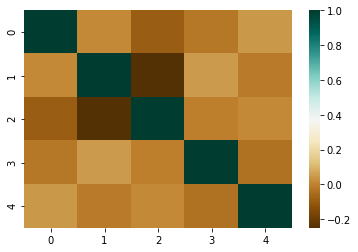

In [16]:
from sklearn.decomposition import PCA
X3=X
y3=y
variance_pct = 5 # Porcentaje mínimo de varianza para describir
pca = PCA(n_components=variance_pct) # Crea un objeto PCA
X_transformed = pca.fit_transform(X3,y3) # Tranforsma las características iniciales
X3pca = pd.DataFrame(X_transformed) # Crea un cuadro de datos de pandas con los datos transformados
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3pca, y3, test_size=0.2)
print('\n Feature Names: \n\n', X3pca.columns.values, "\n")
#print('First Few Values, After PCA: \n\n,',X3pca.head(),'\n\n')
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train3.corr(),cmap="BrBG",annot=False)

# Paso 5:
Evaluemos el Performance del módelo. Para ello
- Rellene dentro de clf1, clf2 y clf3 con X_train, Y_train; X_train2, Y_train2 etc
- Haga un format para concatenar al final de cada print el score de cada clf

In [17]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train, Y_train)
clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train2, Y_train2)
clf3 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf3.fit(X_train3, Y_train3)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, Y_test)))
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(X_train2, Y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(X_test2, Y_test2)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(X_train3, Y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(X_test3, Y_test3)))

Accuracy of Decision Tree classifier on original training set: 0.96
Accuracy of Decision Tree classifier on original test set: 0.87
Accuracy of Decision Tree classifier on reduced training set: 0.92
Accuracy of Decision Tree classifier on reduced test set: 0.89
Accuracy of Decision Tree classifier on PCA-transformed training set: 0.95
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.96


# Paso 6:
Exploremos los árboles de decisión. Grafica el primero y modifica los valores resaltados en ### para que el código funcione.

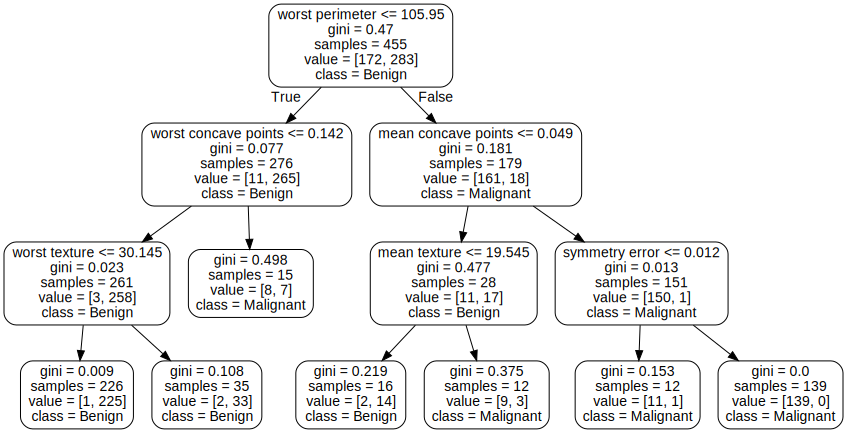

In [18]:
feature_names1 = X.columns.values
feature_names2 = X2.columns.values
feature_names3 = X3pca.columns.values

def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
plot_decision_tree1(clf1,feature_names1)

# Paso 7:

Gráfica el árboles de decisión que resta con la función plot_decision_tree.

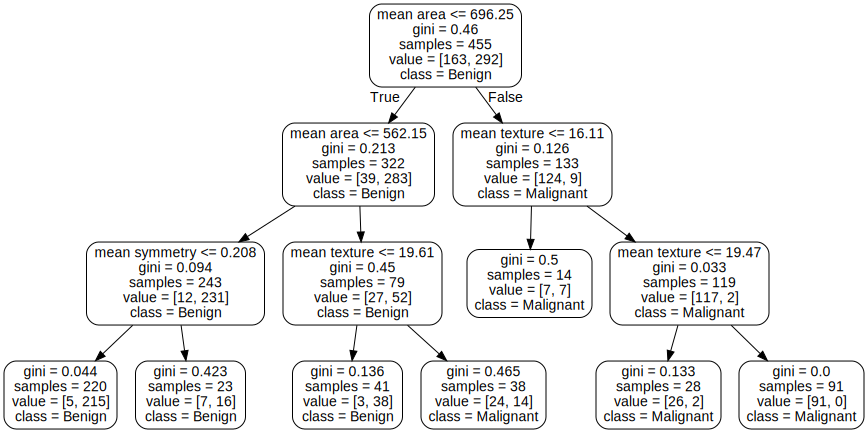

In [19]:
plot_decision_tree1(clf2,feature_names2)

# Paso 8:
Discutan e Interpreten el árbol de decisión